### Collecting Custom images and preparing them

In [4]:
from duckduckgo_search import DDGS

result = DDGS().images(
    "Koshari",
    max_results=5,
)

for item in result:
    print(item)

{'title': 'Koshari (the National Dish of Egypt) | GradFood', 'image': 'https://gradfood.com/wp-content/uploads/2021/06/Koshari-2-1536x1152.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.VEM8pweKerueBZGyH9aorgHaFj&pid=Api', 'url': 'https://gradfood.com/koshari-the-national-dish-of-egypt/', 'height': 1152, 'width': 1536, 'source': 'Bing'}
{'title': 'How to make Egyptian Koshari: A step-by-step guide (Koshary ...', 'image': 'https://www.chocolatesandchai.com/wp-content/uploads/2023/02/Egyptian-Koshari-Featured.jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.XFp_m6xzCXDfDZYpH6mlFQHaHa&pid=Api', 'url': 'https://www.chocolatesandchai.com/egyptian-koshari-koshary-recipe/', 'height': 1200, 'width': 1200, 'source': 'Bing'}
{'title': 'Khichdi to Egyptian koshari, and the magic of food beyond borders', 'image': 'https://static.toiimg.com/imagenext/toiblogs/photo/blogs/wp-content/uploads/2023/06/ss_b_koshari_2c.jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.ARP6KydOROnc0KUB9

In [2]:
from pathlib import Path
from duckduckgo_search import DDGS
from random import shuffle
import requests

def download_class_images(query, max_results=5, output_dir='images', split=0.8):
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)
    results = DDGS().images(query, max_results=max_results)
    
    train_dir = output_dir / 'train'
    train_dir.mkdir(parents=True, exist_ok=True)
    val_dir = output_dir / 'val'
    val_dir.mkdir(parents=True, exist_ok=True)
    
    split_index = int(len(results) * split)
    shuffle(results)
    class_name = query.lower()
    
    train_dir = train_dir / class_name
    train_dir.mkdir(parents=True, exist_ok=True)
    val_dir = val_dir / class_name
    val_dir.mkdir(parents=True, exist_ok=True)
    
    train_offset = len(list(train_dir.glob('*.jpg')))
    cnt = 0
    for i, item in enumerate(results[:split_index], start=train_offset):
        image_url = item['image']
        image_path = train_dir / f"{query}_{i+1}.jpg"
        
        try:
            response = requests.get(image_url, timeout=5)
            if response.status_code == 200:
                with open(image_path, 'wb') as f:
                    f.write(response.content)
        except requests.exceptions.RequestException as e:
            print(f"Skipped {image_url} due to error: {e}")
            cnt += 1
                
    val_offset = len(list(val_dir.glob('*.jpg')))
    for i, item in enumerate(results[split_index:], start=val_offset):
        image_url = item['image']
        image_path = val_dir / f"{query}_{i+1}.jpg"
        
        try:
            response = requests.get(image_url, timeout=5)
            if response.status_code == 200:
                with open(image_path, 'wb') as f:
                    f.write(response.content)
        except requests.exceptions.RequestException as e:
            print(f"Skipped {image_url} due to error: {e}")
            cnt += 1
                
    print(f"Downloaded {len(results) - cnt} images for class '{class_name}'")

In [12]:
download_class_images("Koshari", max_results=10, output_dir='images', split=0.8)

Downloaded 10 images for class 'koshari'


In [15]:
download_class_images("Koshari", max_results=250, output_dir='images', split=0.8)
download_class_images("Mulukhiyah", max_results=250, output_dir='images', split=0.8)

Skipped https://arabicfoodtips.com/wp-content/uploads/2021/07/IMG-20210731-WA0005.jpg due to error: HTTPSConnectionPool(host='arabicfoodtips.com', port=443): Max retries exceeded with url: /wp-content/uploads/2021/07/IMG-20210731-WA0005.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001DB8F1E4050>, 'Connection to arabicfoodtips.com timed out. (connect timeout=5)'))
Skipped https://i1.delgarm.com/i/811/0108/09/1667242065a72c.jpg due to error: HTTPSConnectionPool(host='i1.delgarm.com', port=443): Max retries exceeded with url: /i/811/0108/09/1667242065a72c.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001DB8F1E4550>, 'Connection to i1.delgarm.com timed out. (connect timeout=5)'))
Skipped https://www.diningandcooking.com/wp-content/uploads/2021/05/xf0vq2lerl171-scaled.jpg due to error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Skipped https://globalkitchentrave

In [3]:
from pathlib import Path
from PIL import Image, UnidentifiedImageError

def remove_corrupted_images(directory):
    directory = Path(directory)
    
    cnt = 0
    for image_path in directory.rglob('*.jpg'):
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify that it is an image
        except (UnidentifiedImageError, OSError):
            print(f"Removing corrupted image: {image_path}")
            image_path.unlink()
            cnt += 1
            
    print(f"Removed {cnt} corrupted images from {directory}")

In [17]:
remove_corrupted_images("images")

Removing corrupted image: images\val\koshari\Koshari_10.jpg
Removing corrupted image: images\val\koshari\Koshari_18.jpg
Removing corrupted image: images\val\koshari\Koshari_33.jpg
Removing corrupted image: images\val\koshari\Koshari_43.jpg
Removing corrupted image: images\train\koshari\Koshari_21.jpg
Removing corrupted image: images\train\koshari\Koshari_36.jpg
Removing corrupted image: images\train\koshari\Koshari_7.jpg
Removed 7 corrupted images from images


In [4]:
import hashlib
from pathlib import Path
 
def remove_duplicate_images(directory):
    remove_corrupted_images(directory)  # Clean up corrupted images first
    directory = Path(directory)
    hashes = set()
    duplicates = 0
    
    for image_path in directory.rglob('*.jpg'):
        dup = False
        with open(image_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            if file_hash in hashes:
                duplicates += 1
                dup = True
            else:
                hashes.add(file_hash)
                
        if dup:    
            image_path.unlink()
            print(f"Duplicate found and removed: {image_path}")
    
    print(f"Removed {duplicates} duplicate images from {directory}") 

In [22]:
remove_duplicate_images("images")

Removed 0 corrupted images from images
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_155.jpg
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_45.jpg
Removed 2 duplicate images from images


### Creating a dataset wrapper that supports indexing by offset

* we want to retrieve correct lable indices when concatenating multiple datasets
* we then concat our data and create loaders

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image

class OffsetDataset(Dataset):
    def __init__(self, dataset, label_offset):
        self.dataset = dataset
        self.offset = label_offset

    def __getitem__(self, idx):
        x, y = self.dataset[idx]
        return x, y + self.offset

    def __len__(self):
        return len(self.dataset)

In [2]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image

transform = transforms.Compose([
    transforms.RandomResizedCrop(224),              
    transforms.RandomHorizontalFlip(),            
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=transform)

In [3]:
from torch.utils.data import ConcatDataset

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])


In [4]:
train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)

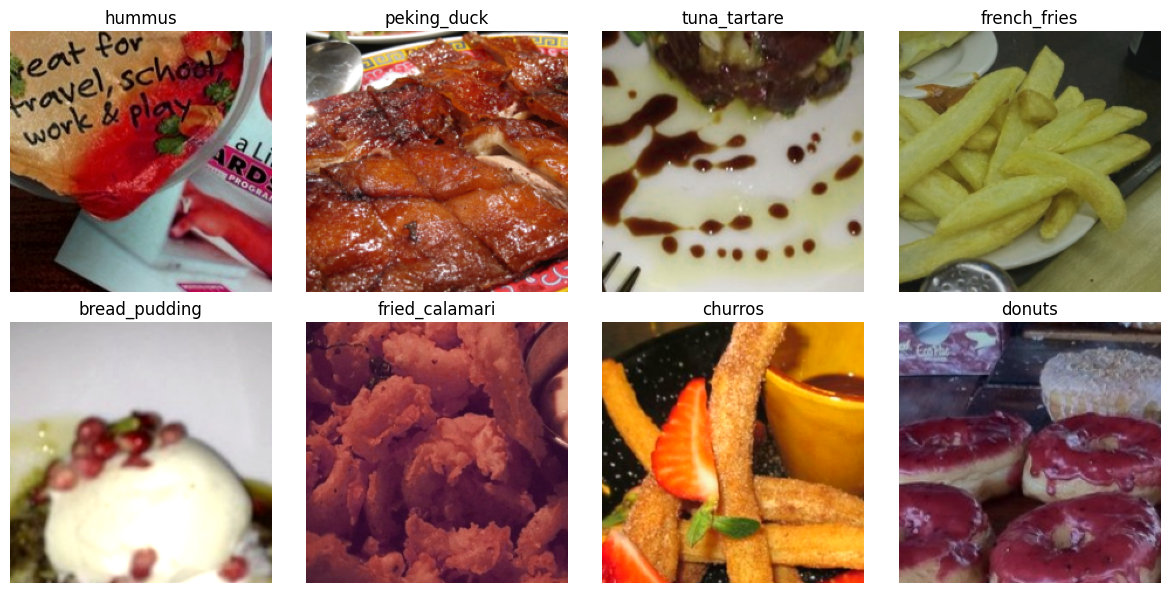

In [5]:
import matplotlib.pyplot as plt
import torch
img, lbl = next(iter(train_loader))

# Unnormalize to display
def unnormalize(t):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
    return t * std + mean

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(unnormalize(img[i]).permute(1, 2, 0).numpy())
    plt.title(class_names[lbl[i].item()])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
len(class_names)

103

### Creating our model

* We will use resnet50 architecture with pretrained weights
* We will fine tune the model by gradually unfreezing the outer layers

In [2]:
import torch
from torch import nn
from torchvision.models import resnet50, ResNet50_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = ResNet50_Weights.DEFAULT
        self.base_model = resnet50(weights=weights)
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

In [ ]:
model = FoodClassifier(num_classes=len(class_names)).to(device)
model.state_dict()

In [8]:
from torchinfo import summary
summary(model, input_size=(1, 3, 224, 224), device=device)

Layer (type:depth-idx)                        Output Shape              Param #
FoodClassifier                                [1, 103]                  --
├─ResNet: 1-1                                 [1, 103]                  --
│    └─Conv2d: 2-1                            [1, 64, 112, 112]         9,408
│    └─BatchNorm2d: 2-2                       [1, 64, 112, 112]         128
│    └─ReLU: 2-3                              [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-4                         [1, 64, 56, 56]           --
│    └─Sequential: 2-5                        [1, 256, 56, 56]          --
│    │    └─Bottleneck: 3-1                   [1, 256, 56, 56]          75,008
│    │    └─Bottleneck: 3-2                   [1, 256, 56, 56]          70,400
│    │    └─Bottleneck: 3-3                   [1, 256, 56, 56]          70,400
│    └─Sequential: 2-6                        [1, 512, 28, 28]          --
│    │    └─Bottleneck: 3-4                   [1, 512, 28, 28]          379,392

In [9]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for param in model.base_model.fc.parameters(): # Unfreeze the final layer
    param.requires_grad = True


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.base_model.fc.parameters(), lr=1e-3)

epochs = 5

In [11]:
"""for images, labels in (train_loader):
            images, labels = images.to(device), labels.to(device)
            print(labels.min().item(), labels.max().item())"""

'for images, labels in (train_loader):\n            images, labels = images.to(device), labels.to(device)\n            print(labels.min().item(), labels.max().item())'

Time for training, I made a logical error which hurts my training efficiency later by putting `model.train()` outside the epochs loop and then entering evaluation mode during the epochs, which makes the model stay in evaluation mode during all the next epochs.

* This turns off Dropout layers and BatchNorm layers which are important for training.
* I later fixed this.
* We notice that the model will still make progress anyway.

In [14]:
from tqdm.auto import tqdm
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

def validate(model, val_loader, loss_fn, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.inference_mode():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader.dataset)
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")

def train(model, train_loader, val_loader, loss_fn, optimizer, epochs, device):
    model.train()
    for epoch in range(epochs):
        train_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss /= len(train_loader.dataset)
        accuracy = correct / total * 100
        
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
        
        validate(model, val_loader, loss_fn, device)

In [15]:
train(model, train_loader, val_loader, loss_fn, optimizer, epochs, device)

Epoch 1/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 2.8219, Train Accuracy: 36.12%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 2.1369, Validation Accuracy: 48.64%


Epoch 2/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 2.1539, Train Accuracy: 48.19%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.9341, Validation Accuracy: 51.86%


Epoch 3/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 2.0105, Train Accuracy: 51.06%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.8759, Validation Accuracy: 53.40%


Epoch 4/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.9270, Train Accuracy: 52.80%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.8269, Validation Accuracy: 54.30%


Epoch 5/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.8881, Train Accuracy: 53.52%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.7972, Validation Accuracy: 55.03%


Unfreezing layer4 with fc layer

In [16]:
for name, param in model.base_model.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True
        
trainable_params = [param for param in model.parameters() if param.requires_grad]

optimizer = torch.optim.Adam(trainable_params, lr=1e-4)


In [17]:
train(model, train_loader, val_loader, loss_fn, optimizer, epochs, device)

Epoch 1/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.5884, Train Accuracy: 60.07%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.2705, Validation Accuracy: 67.17%


Epoch 2/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.4198, Train Accuracy: 63.95%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.2588, Validation Accuracy: 67.25%


Epoch 3/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.2771, Train Accuracy: 67.18%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.2061, Validation Accuracy: 68.51%


Epoch 4/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.1890, Train Accuracy: 69.39%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.1318, Validation Accuracy: 70.27%


Epoch 5/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.1248, Train Accuracy: 70.74%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.1509, Validation Accuracy: 69.99%


Moving on to layer 3

In [18]:
for name, param in model.base_model.named_parameters():
    if "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True
        
trainable_params = [param for param in model.parameters() if param.requires_grad]

optimizer = torch.optim.Adam(trainable_params, lr=5e-5)

In [19]:
train(model, train_loader, val_loader, loss_fn, optimizer, epochs, device)

Epoch 1/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 1.0045, Train Accuracy: 73.73%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.9586, Validation Accuracy: 74.40%


Epoch 2/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.9992, Train Accuracy: 73.59%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.0076, Validation Accuracy: 73.15%


Epoch 3/5:   0%|          | 0/2377 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Validation Loss Plateau Problem

* we need to lower learning rate when validation loss plateaus, which could indicate that a slight overfitting is occurring.

In [ ]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)
# To lower the learning rate when validation loss plateaus

In [21]:
def validate(model, val_loader, loss_fn, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.inference_mode():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader.dataset)
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss

def train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device):
    model.train()
    for epoch in range(epochs):
        train_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss /= len(train_loader.dataset)
        accuracy = correct / total * 100
        
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
        
        scheduler.step(validate(model, val_loader, loss_fn, device))

In [23]:
epochs = 3

train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.8216, Train Accuracy: 78.11%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.8826, Validation Accuracy: 76.22%


Epoch 2/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.8693, Train Accuracy: 76.79%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 1.0630, Validation Accuracy: 72.69%


Epoch 3/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.7963, Train Accuracy: 78.72%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.9865, Validation Accuracy: 74.12%


### Fixing the `model.train()` Positioning Logical Error

In [8]:
import torch
from tqdm.auto import tqdm

def validate(model, val_loader, loss_fn, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.inference_mode():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader.dataset)
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss

def train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device):
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss /= len(train_loader.dataset)
        accuracy = correct / total * 100
        
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
        
        scheduler.step(validate(model, val_loader, loss_fn, device))

In [25]:
epochs = 3
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.7218, Train Accuracy: 80.81%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.8664, Validation Accuracy: 77.22%


Epoch 2/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.6965, Train Accuracy: 81.35%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.8572, Validation Accuracy: 77.59%


Epoch 3/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.6576, Train Accuracy: 82.27%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.8594, Validation Accuracy: 77.23%


### Saving the model to continue training later

In [ ]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_names': class_names  
}, "checkpoint.pth")

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Loading

In [15]:
model = FoodClassifier(num_classes=len(class_names)).to(device)
checkpoint = torch.load("checkpoint.pth", map_location=device) 
model.load_state_dict(checkpoint["model_state_dict"])
model.state_dict()

OrderedDict([('base_model.conv1.weight',
              tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
                         -2.0325e-02,  8.8140e-03],
                        [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
                          2.9346e-02, -5.8331e-02],
                        [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
                          2.1868e-01, -7.2909e-02],
                        ...,
                        [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
                         -5.7855e-01,  2.2461e-01],
                        [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
                         -4.9317e-02, -6.8082e-02],
                        [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
                          1.8976e-01, -2.2302e-02]],
              
                       [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
                     

### Unfreezing another layer

* I explored setting different learning rates for different layers. For instance, the Fully Connected layer has the highest learning rate.

In [17]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False

for name, param in model.base_model.named_parameters():
    if "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

optimizer = torch.optim.Adam([
    {'params': model.base_model.fc.parameters(), 'lr': 1e-3},
    {'params': model.base_model.layer2.parameters(), 'lr': 5e-5},
    {'params': model.base_model.layer3.parameters(), 'lr': 5e-5},
    {'params': model.base_model.layer4.parameters(), 'lr': 5e-5},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

loss_fn = nn.CrossEntropyLoss()

In [18]:
epochs = 5
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.7164, Train Accuracy: 80.46%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.8840, Validation Accuracy: 76.85%


Epoch 2/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.6652, Train Accuracy: 81.96%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.8955, Validation Accuracy: 76.87%


Epoch 3/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.6287, Train Accuracy: 82.74%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.9054, Validation Accuracy: 77.04%


Epoch 4/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.5980, Train Accuracy: 83.60%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.8998, Validation Accuracy: 76.87%


Epoch 5/5:   0%|          | 0/2377 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [19]:
optimizer = torch.optim.Adam([
    {'params': model.base_model.fc.parameters(), 'lr': 5e-4}, 
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5},
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5},
])

### Increasing Augmentation Power

In [21]:
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image

transform = transforms.Compose([
    transforms.RandomResizedCrop(224),              
    transforms.RandomHorizontalFlip(),            
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=transform)

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])

train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)


In [23]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [24]:
epochs = 3
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.6580, Train Accuracy: 82.08%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.9615, Validation Accuracy: 75.86%


Epoch 2/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.5949, Train Accuracy: 83.68%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.9535, Validation Accuracy: 76.32%


Epoch 3/3:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.5601, Train Accuracy: 84.79%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.9442, Validation Accuracy: 76.44%


In [25]:
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [26]:
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image

transform = transforms.Compose([
    transforms.RandomResizedCrop(224),              
    transforms.RandomHorizontalFlip(),            
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=val_transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=val_transform)

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])

train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)


In [27]:
epochs = 5

In [28]:
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.5452, Train Accuracy: 84.99%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.6181, Validation Accuracy: 84.88%


Epoch 2/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.5229, Train Accuracy: 85.70%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.6300, Validation Accuracy: 85.13%


Epoch 3/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.5093, Train Accuracy: 85.97%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.6239, Validation Accuracy: 85.15%


Epoch 4/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.5043, Train Accuracy: 86.24%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.6361, Validation Accuracy: 85.09%


Epoch 5/5:   0%|          | 0/2377 [00:00<?, ?it/s]

Train Loss: 0.4754, Train Accuracy: 87.00%


Validation:   0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss: 0.6267, Validation Accuracy: 85.11%


In [29]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_names': class_names  
}, "checkpoint2.pth")

In [34]:
from torchmetrics import Accuracy, ConfusionMatrix, F1Score, Precision, Recall
from sklearn.metrics import classification_report
import random

random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

num_classes = len(class_names) 

acc = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
f1 = F1Score(task="multiclass", num_classes=len(class_names)).to(device)
precision = Precision(task="multiclass", num_classes=len(class_names)).to(device)
recall = Recall(task="multiclass", num_classes=len(class_names)).to(device)

model.eval()
with torch.inference_mode():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        acc.update(preds, labels)
        f1.update(preds, labels)
        precision.update(preds, labels)
        recall.update(preds, labels)


print(f"Accuracy:  {acc.compute().item():.4f}")
print(f"F1 Score:  {f1.compute().item():.4f}")
print(f"Precision: {precision.compute().item():.4f}")
print(f"Recall:    {recall.compute().item():.4f}")

Accuracy:  0.8511
F1 Score:  0.8511
Precision: 0.8511
Recall:    0.8511


In [37]:
import matplotlib.pyplot as plt
import torch
import random

def show_predictions_grid(model, val_dataset, class_names, device, rows=3, cols=4):
    model.eval()
    num_images = rows * cols
    indices = random.sample(range(len(val_dataset)), num_images)

    plt.figure(figsize=(4 * cols, 4 * rows))

    for i, idx in enumerate(indices):
        image, true_label = val_dataset[idx]
        input_tensor = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            pred_label = output.argmax(1).item()

        # Convert tensor to numpy image for plotting
        img_np = image.permute(1, 2, 0).cpu().numpy()
        mean = torch.tensor([0.485, 0.456, 0.406])
        std = torch.tensor([0.229, 0.224, 0.225])
        img_np = (img_np * std.numpy()) + mean.numpy()  # unnormalize
        img_np = img_np.clip(0, 1)

        plt.subplot(rows, cols, i+1)
        plt.imshow(img_np)
        plt.axis('off')
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"T: {class_names[true_label]}\nP: {class_names[pred_label]}", color=color, fontsize=10)

    plt.tight_layout()
    plt.show()


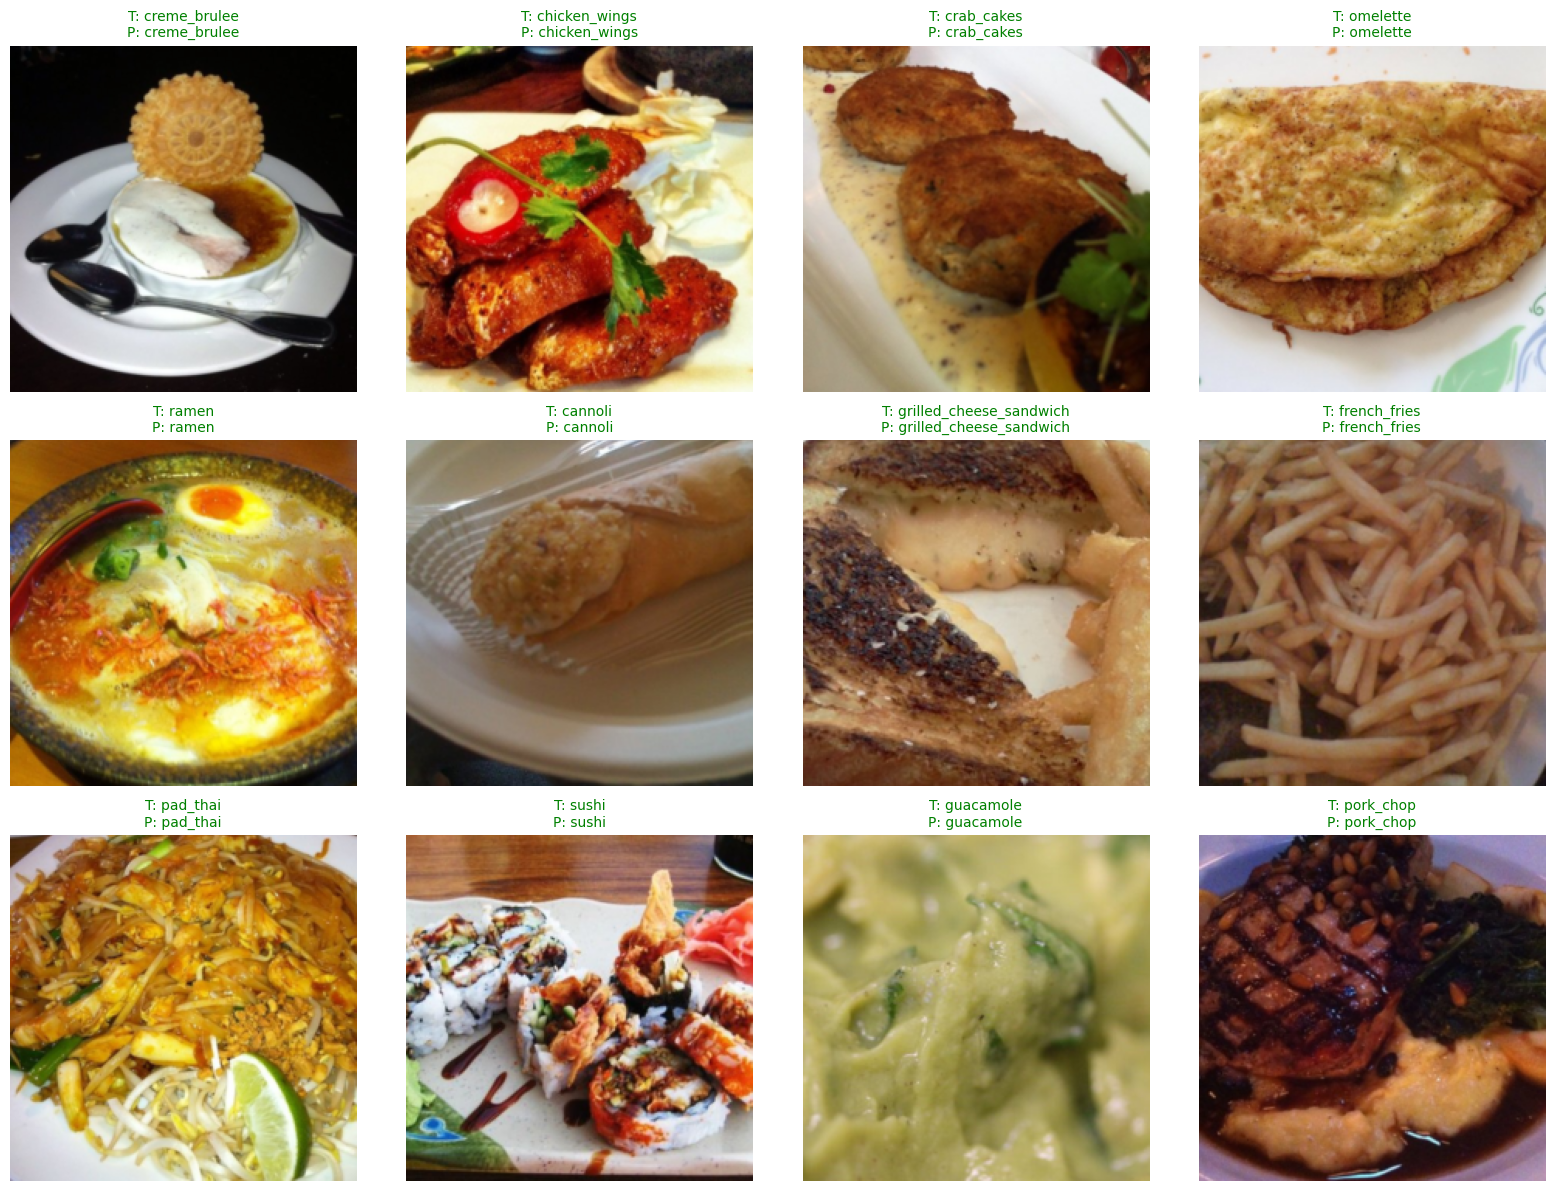

In [38]:
show_predictions_grid(model, concat_val_dataset, class_names, device, rows=3, cols=4)


Current Accuracy is 85% with good Precision and Recall. Let's see if we can boost it.

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [23]:
download_class_images("Mulukhiyah", max_results=600)

Skipped https://littlecook.io/api/open-graph-image-gen?title=Mulukhiyah&image=https://ik.imagekit.io/littlecook/public_images/recipes/mulukhiyah.jpg due to error: HTTPSConnectionPool(host='littlecook.io', port=443): Read timed out. (read timeout=5)
Skipped https://previews.agefotostock.com/previewimage/medibigoff/f4286f555824e2d6d557d95950bf5ad0/wr1764630.jpg due to error: HTTPSConnectionPool(host='previews.agefotostock.com', port=443): Max retries exceeded with url: /previewimage/medibigoff/f4286f555824e2d6d557d95950bf5ad0/wr1764630.jpg (Caused by SSLError(SSLError(1, '[SSL: TLSV1_UNRECOGNIZED_NAME] tlsv1 unrecognized name (_ssl.c:1018)')))
Skipped https://veggiesinfo.com/wp-content/uploads/2016/03/Mulukhiyah-medicinal-values-300x300.jpg due to error: HTTPSConnectionPool(host='veggiesinfo.com', port=443): Max retries exceeded with url: /wp-content/uploads/2016/03/Mulukhiyah-medicinal-values-300x300.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000

In [24]:
remove_duplicate_images("images")

Removing corrupted image: images\train\mulukhiyah\Mulukhiyah_210.jpg
Removed 1 corrupted images from images
Duplicate found and removed: images\val\mulukhiyah\Mulukhiyah_27.jpg
Duplicate found and removed: images\val\mulukhiyah\Mulukhiyah_3.jpg
Duplicate found and removed: images\val\mulukhiyah\Mulukhiyah_44.jpg
Duplicate found and removed: images\val\mulukhiyah\Mulukhiyah_73.jpg
Duplicate found and removed: images\val\mulukhiyah\Mulukhiyah_78.jpg
Duplicate found and removed: images\val\mulukhiyah\Mulukhiyah_96.jpg
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_111.jpg
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_122.jpg
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_14.jpg
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_149.jpg
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_150.jpg
Duplicate found and removed: images\train\mulukhiyah\Mulukhiyah_164.jpg
Duplicate found and removed: images\train\mulukh

In [25]:
from pathlib import Path

train_dir = Path("images/train/mulukhiyah")
val_dir = Path("images/val/mulukhiyah")

len(list(train_dir.glob('*.jpg'))), len(list(val_dir.glob('*.jpg')))

(255, 88)

In [10]:
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform = transforms.Compose([
    transforms.RandomResizedCrop(224),              
    transforms.RandomHorizontalFlip(),            
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
     transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=val_transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=val_transform)

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])

train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)


In [4]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

checkpoint = torch.load("checkpoint4.pth", map_location=device)
model = FoodClassifier(num_classes=len(class_names)).to(device)
model.load_state_dict(checkpoint["model_state_dict"])
model.state_dict()

OrderedDict([('base_model.conv1.weight',
              tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
                         -2.0325e-02,  8.8140e-03],
                        [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
                          2.9346e-02, -5.8331e-02],
                        [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
                          2.1868e-01, -7.2909e-02],
                        ...,
                        [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
                         -5.7855e-01,  2.2461e-01],
                        [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
                         -4.9317e-02, -6.8082e-02],
                        [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
                          1.8976e-01, -2.2302e-02]],
              
                       [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
                     

In [8]:
import torch
from tqdm.auto import tqdm
from torchvision.transforms import v2

def validate(model, val_loader, loss_fn, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.inference_mode():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            predicted = torch.argmax(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader.dataset)
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss

def train_with_scheduler_v2_aug(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, num_classes):
    cutmix = v2.CutMix(num_classes=num_classes).to(device)
    mixup = v2.MixUp(num_classes=num_classes).to(device)
    cutmix_or_mixup = v2.RandomChoice([cutmix, mixup])
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            images, labels = cutmix_or_mixup(images, labels) # Apply CutMix or MixUp augmentation -> labels become one-hot encoded
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            predicted = torch.argmax(outputs, 1)
            hard_labels = torch.argmax(labels, dim=1)
            total += hard_labels.size(0)
            correct += (predicted == hard_labels).sum().item()
        
        train_loss /= len(train_loader.dataset)
        accuracy = correct / total * 100
        
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
        
        scheduler.step(validate(model, val_loader, loss_fn, device))

In [5]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([
    {'params': model.base_model.fc.parameters(), 'lr': 5e-4}, 
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5},
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [12]:
epochs = 3
train_with_scheduler_v2_aug(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, num_classes=len(class_names))

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.2042, Train Accuracy: 64.64%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6984, Validation Accuracy: 85.03%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.1812, Train Accuracy: 64.77%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.7775, Validation Accuracy: 84.58%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.1883, Train Accuracy: 64.37%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.7725, Validation Accuracy: 84.63%


In [11]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([
    {'params': model.base_model.fc.parameters(), 'lr': 5e-4, 'weight_decay': 1e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [24]:
epochs = 3
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5304, Train Accuracy: 86.09%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5727, Validation Accuracy: 85.42%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4833, Train Accuracy: 86.98%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5973, Validation Accuracy: 85.20%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4713, Train Accuracy: 87.28%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6015, Validation Accuracy: 85.33%


In [12]:
epochs = 3
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5212, Train Accuracy: 85.74%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6103, Validation Accuracy: 85.66%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5039, Train Accuracy: 86.27%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6226, Validation Accuracy: 85.16%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5146, Train Accuracy: 85.94%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6105, Validation Accuracy: 85.42%


### Modify the model classifier

* It seems we have hit a wall, val loss plateaus even after modifying transformations and optimizer
* Time for one last plan, we modify the classifier layer

In [3]:
import torch
from torch import nn
from torchvision.models import resnet50, ResNet50_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = ResNet50_Weights.DEFAULT
        self.base_model = resnet50(weights=weights)
        #self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [17]:
checkpoint = torch.load("checkpoint3.pth", map_location=device)
model = FoodClassifier(num_classes=len(class_names)).to(device)
model.load_state_dict(checkpoint["model_state_dict"], strict=False) # model classifier is modified

_IncompatibleKeys(missing_keys=['base_model.fc.0.weight', 'base_model.fc.0.bias', 'base_model.fc.3.weight', 'base_model.fc.3.bias'], unexpected_keys=['base_model.fc.weight', 'base_model.fc.bias'])

In [ ]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([
    {'params': model.base_model.fc.parameters(), 'lr': 5e-4, 'weight_decay': 1e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [19]:
epochs = 3 # let's train now
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.6360, Train Accuracy: 59.72%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5625, Validation Accuracy: 84.15%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.0998, Train Accuracy: 71.04%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5229, Validation Accuracy: 85.43%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.0149, Train Accuracy: 73.20%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5300, Validation Accuracy: 85.65%


In [20]:
epochs = 2
train_with_scheduler(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device)

Epoch 1/2:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.9560, Train Accuracy: 74.48%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5217, Validation Accuracy: 86.11%


Epoch 2/2:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.9259, Train Accuracy: 75.36%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5114, Validation Accuracy: 86.45%


In [6]:
import torch
from tqdm.auto import tqdm

def validate(model, val_loader, loss_fn, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.inference_mode():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader.dataset)
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss

def train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names, patience=3):
    cur_patience = 0
    min_loss = float('inf')
    delta = 0.0001
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss /= len(train_loader.dataset)
        accuracy = correct / total * 100
        
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
        
        val_loss = validate(model, val_loader, loss_fn, device)
        scheduler.step(val_loss)
        
        if val_loss < min_loss - delta:
            cur_patience = 0
            min_loss = val_loss
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'class_names': class_names,  
            }, "final_model.pth")
        else:
            cur_patience += 1
            if cur_patience >= patience:
                print("Early Stopping to prevent overfitting")
                break

In [29]:
epochs = 5
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/5:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.9174, Train Accuracy: 75.98%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5087, Validation Accuracy: 86.84%


Epoch 2/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.8635, Train Accuracy: 77.23%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5046, Validation Accuracy: 86.97%


Epoch 3/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.8316, Train Accuracy: 77.97%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5104, Validation Accuracy: 86.88%


Epoch 4/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.8147, Train Accuracy: 78.45%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5121, Validation Accuracy: 86.88%


Epoch 5/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.7978, Train Accuracy: 78.72%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5076, Validation Accuracy: 87.03%
Early Stopping to prevent overfitting


In [30]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ # Reduce LR further
    {'params': model.base_model.fc.parameters(), 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 5e-6, 'weight_decay': 1e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 5e-6, 'weight_decay': 1e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 5e-6, 'weight_decay': 1e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 5e-6, 'weight_decay': 1e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [31]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.7512, Train Accuracy: 79.86%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5079, Validation Accuracy: 87.44%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.7175, Train Accuracy: 80.85%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5041, Validation Accuracy: 87.47%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.7060, Train Accuracy: 81.16%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5066, Validation Accuracy: 87.50%


In [32]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ # Reduce LR further
    {'params': model.base_model.fc.parameters(), 'lr': 5e-5, 'weight_decay': 1e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-6, 'weight_decay': 1e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-6, 'weight_decay': 1e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-6, 'weight_decay': 1e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-6, 'weight_decay': 1e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [33]:
epochs = 2
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/2:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.6980, Train Accuracy: 81.32%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5020, Validation Accuracy: 87.52%


Epoch 2/2:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.6851, Train Accuracy: 81.59%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4983, Validation Accuracy: 87.55%


In [34]:
torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'class_names': class_names,  
            }, "checkpoint5.pth")

In [4]:
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from torchvision.transforms import AutoAugment, AutoAugmentPolicy
from PIL import Image

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=val_transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=val_transform)

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])

train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)


In [7]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

checkpoint = torch.load("checkpoint5.pth", map_location=device)

model = FoodClassifier(num_classes=len(class_names)).to(device)
model.load_state_dict(checkpoint["model_state_dict"]) 

<All keys matched successfully>

In [13]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ # Reduce LR further
    {'params': model.base_model.fc.parameters(), 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=1,)

In [14]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.6211, Train Accuracy: 83.25%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4760, Validation Accuracy: 87.62%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4572, Train Accuracy: 87.13%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4816, Validation Accuracy: 87.71%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3897, Train Accuracy: 88.84%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4881, Validation Accuracy: 87.75%


In [15]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3357, Train Accuracy: 90.18%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4911, Validation Accuracy: 87.83%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3161, Train Accuracy: 90.75%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4899, Validation Accuracy: 87.99%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.2923, Train Accuracy: 91.47%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4916, Validation Accuracy: 87.98%


In [16]:
import torch
from torch import nn
from torchvision.models import resnet50, ResNet50_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = ResNet50_Weights.DEFAULT
        self.base_model = resnet50(weights=weights)
        #self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [23]:
model = FoodClassifier(num_classes=len(class_names)).to(device)
checkpoint = torch.load("final_model.pth", map_location=device)
state_dict = checkpoint["model_state_dict"]
filtered_state_dict = {k: v for k, v in state_dict.items() if not k.startswith("base_model.fc")}
model.load_state_dict(filtered_state_dict, strict=False)


_IncompatibleKeys(missing_keys=['base_model.fc.0.weight', 'base_model.fc.0.bias', 'base_model.fc.3.weight', 'base_model.fc.3.bias'], unexpected_keys=[])

In [5]:
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from torchvision.transforms import AutoAugment, AutoAugmentPolicy
from PIL import Image

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=val_transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=val_transform)

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])

train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)


In [25]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ # Reduce LR further
    {'params': model.base_model.fc.parameters(), 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5, 'weight_decay': 1e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [26]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.2994, Train Accuracy: 70.03%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4679, Validation Accuracy: 86.96%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.6681, Train Accuracy: 81.82%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4430, Validation Accuracy: 87.76%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5637, Train Accuracy: 84.37%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4440, Validation Accuracy: 87.77%


Epoch 4/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4938, Train Accuracy: 86.34%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4512, Validation Accuracy: 87.78%


Epoch 5/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4452, Train Accuracy: 87.65%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4486, Validation Accuracy: 88.01%
Early Stopping to prevent overfitting


In [28]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ # Reduce LR further
    {'params': model.base_model.fc.parameters(), 'lr': 5e-5, 'weight_decay': 5e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [29]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.4009, Train Accuracy: 88.67%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4457, Validation Accuracy: 88.28%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3860, Train Accuracy: 89.22%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4454, Validation Accuracy: 88.23%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3695, Train Accuracy: 89.56%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4466, Validation Accuracy: 88.14%


Epoch 4/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3475, Train Accuracy: 90.21%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4515, Validation Accuracy: 88.04%


Epoch 5/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3311, Train Accuracy: 90.61%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4535, Validation Accuracy: 88.09%
Early Stopping to prevent overfitting


In [30]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ # Reduce LR further
    {'params': model.base_model.fc.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4},     
    {'params': model.base_model.layer1.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4}, 
    {'params': model.base_model.layer2.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4},
    {'params': model.base_model.layer3.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4},
    {'params': model.base_model.layer4.parameters(), 'lr': 1e-5, 'weight_decay': 5e-4},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [31]:
epochs = 4
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/4:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3155, Train Accuracy: 91.19%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4534, Validation Accuracy: 88.02%


Epoch 2/4:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3020, Train Accuracy: 91.52%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4519, Validation Accuracy: 88.24%


Epoch 3/4:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.2899, Train Accuracy: 91.81%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4543, Validation Accuracy: 88.10%


Epoch 4/4:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.2733, Train Accuracy: 92.47%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4605, Validation Accuracy: 88.23%


In [32]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_names': class_names,  
}, "checkpoint6.pth")


In [33]:
import torch
from torch import nn
from torchvision.models import resnet50, ResNet50_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = ResNet50_Weights.DEFAULT
        self.base_model = resnet50(weights=weights)
        #self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [35]:
checkpoint = torch.load("checkpoint6.pth", map_location=device)

model = FoodClassifier(len(class_names)).to(device)
model.load_state_dict(checkpoint["model_state_dict"], strict=False)

_IncompatibleKeys(missing_keys=['base_model.fc.1.weight', 'base_model.fc.1.bias', 'base_model.fc.1.running_mean', 'base_model.fc.1.running_var', 'base_model.fc.4.weight', 'base_model.fc.4.bias'], unexpected_keys=['base_model.fc.3.weight', 'base_model.fc.3.bias'])

In [37]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if "layer1" in name or "layer2" in name or "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True
        

no_decay_params = []
fc_params = []
layer_1_params = []
layer_2_params = []
layer_3_params = []
layer_4_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "fc" in name:
        fc_params.append(param)
    elif "layer1" in name:
        layer_1_params.append(param)
    elif "layer2" in name:
        layer_2_params.append(param)
    elif "layer3" in name:
        layer_3_params.append(param)
    elif "layer4" in name:
        layer_4_params.append(param)
 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': fc_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': layer_1_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': layer_2_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': layer_3_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': layer_4_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [38]:
epochs = 2
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names) 

Epoch 1/2:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.7680, Train Accuracy: 86.09%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4600, Validation Accuracy: 87.82%


Epoch 2/2:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3181, Train Accuracy: 91.90%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4651, Validation Accuracy: 88.02%


In [39]:
epochs = 2
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names) 

Epoch 1/2:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.2698, Train Accuracy: 92.75%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4800, Validation Accuracy: 87.80%


Epoch 2/2:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.2484, Train Accuracy: 93.11%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.4895, Validation Accuracy: 87.73%


In [40]:
import torch
from torch import nn
from torchvision.models import resnet50, ResNet50_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = ResNet50_Weights.DEFAULT
        self.base_model = resnet50(weights=weights)
        #self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [41]:
loss_fn = nn.CrossEntropyLoss()

model = FoodClassifier(len(class_names)).to(device)
checkpoint = torch.load("checkpoint6.pth", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
model.state_dict()

OrderedDict([('base_model.conv1.weight',
              tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
                         -2.0325e-02,  8.8140e-03],
                        [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
                          2.9346e-02, -5.8331e-02],
                        [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
                          2.1868e-01, -7.2909e-02],
                        ...,
                        [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
                         -5.7855e-01,  2.2461e-01],
                        [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
                         -4.9317e-02, -6.8082e-02],
                        [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
                          1.8976e-01, -2.2302e-02]],
              
                       [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
                     

In [46]:
import torch
import torch.nn.functional as F
from tqdm.auto import tqdm

# Define your TTA transforms (augmentations you want at test time)
from torchvision import transforms

tta_transforms = [
    transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.RandomVerticalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
]

def validate(model, dataset, loss_fn, device, tta_transforms):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.inference_mode():
        for img_pil, label in tqdm(dataset, desc="Validation with TTA"):
            label = torch.tensor(label).to(device)
            output_sum = None

            # Apply each TTA transform to the image and average the predictions
            for tform in tta_transforms:
                image = tform(img_pil).unsqueeze(0).to(device)  # Add batch dim
                output = model(image)
                output_sum = output if output_sum is None else output_sum + output

            outputs = output_sum / len(tta_transforms)
            loss = loss_fn(outputs, label.unsqueeze(0))

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == label).item()
            total += 1

    val_loss /= total
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss



In [48]:
food101_val_raw = datasets.Food101(
    root='food101',
    split='test',
    download=False,
    transform=None,  
)

custom_val_raw = datasets.ImageFolder("images/val", transform=None)

concat_val_raw = ConcatDataset([
    OffsetDataset(food101_val_raw, 0),
    OffsetDataset(custom_val_raw, len(food101_train_dataset.classes))
])

validate(model, concat_val_raw, loss_fn, device, tta_transforms)


Validation with TTA:   0%|          | 0/25459 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Loss: 0.4203, Validation Accuracy: 88.48%


0.4203437683967327

In [1]:
import torch
from torch import nn
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = EfficientNet_B3_Weights.IMAGENET1K_V1
        self.base_model = efficientnet_b3(weights=weights)
        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [3]:
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from torchvision.transforms import AutoAugment, AutoAugmentPolicy
from PIL import Image

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=val_transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=val_transform)

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])

train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)


In [7]:
from torchinfo import summary

model = FoodClassifier(num_classes=len(class_names)).to(device)

summary(model, input_size=(1, 3, 224, 224), device=device)

Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to C:\Users\aliab/.cache\torch\hub\checkpoints\efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:19<00:00, 2.56MB/s]


Layer (type:depth-idx)                                       Output Shape              Param #
FoodClassifier                                               [1, 103]                  --
├─EfficientNet: 1-1                                          [1, 103]                  --
│    └─Sequential: 2-1                                       [1, 1536, 7, 7]           --
│    │    └─Conv2dNormActivation: 3-1                        [1, 40, 112, 112]         1,160
│    │    └─Sequential: 3-2                                  [1, 24, 112, 112]         3,504
│    │    └─Sequential: 3-3                                  [1, 32, 56, 56]           48,118
│    │    └─Sequential: 3-4                                  [1, 48, 28, 28]           110,912
│    │    └─Sequential: 3-5                                  [1, 96, 14, 14]           638,700
│    │    └─Sequential: 3-6                                  [1, 136, 14, 14]          1,387,760
│    │    └─Sequential: 3-7                                  [1, 232

In [9]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [11]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 3.7504, Train Accuracy: 17.21%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 2.2595, Validation Accuracy: 48.51%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.7916, Train Accuracy: 32.65%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.7835, Validation Accuracy: 55.90%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.5548, Train Accuracy: 37.41%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.5828, Validation Accuracy: 59.90%


Epoch 4/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.4224, Train Accuracy: 40.27%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.4664, Validation Accuracy: 62.48%


Epoch 5/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.3245, Train Accuracy: 42.38%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.3883, Validation Accuracy: 64.17%


Epoch 6/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.2539, Train Accuracy: 43.68%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.3238, Validation Accuracy: 65.59%


In [12]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f_6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f_6_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f_6_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [13]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 2.1582, Train Accuracy: 45.78%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.1946, Validation Accuracy: 68.26%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 2.0366, Train Accuracy: 48.65%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.1103, Validation Accuracy: 70.18%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.9429, Train Accuracy: 50.79%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 1.0583, Validation Accuracy: 71.40%


Epoch 4/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.8641, Train Accuracy: 52.50%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.9987, Validation Accuracy: 72.74%


Epoch 5/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.8003, Train Accuracy: 53.90%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.9545, Validation Accuracy: 73.67%


Epoch 6/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.7529, Train Accuracy: 55.05%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.9209, Validation Accuracy: 74.77%


In [15]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [16]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 1.6416, Train Accuracy: 57.56%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.8197, Validation Accuracy: 77.35%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.5277, Train Accuracy: 60.31%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.7793, Validation Accuracy: 78.22%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.4521, Train Accuracy: 62.06%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.7431, Validation Accuracy: 79.24%


Epoch 4/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.4024, Train Accuracy: 63.15%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.7157, Validation Accuracy: 79.86%


Epoch 5/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.3415, Train Accuracy: 64.47%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6933, Validation Accuracy: 80.62%


Epoch 6/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.3024, Train Accuracy: 65.44%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6699, Validation Accuracy: 81.04%


In [ ]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f3_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [18]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 1.2600, Train Accuracy: 66.58%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6514, Validation Accuracy: 81.57%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.2159, Train Accuracy: 67.66%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6377, Validation Accuracy: 82.02%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.1836, Train Accuracy: 68.22%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6191, Validation Accuracy: 82.41%


In [19]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name or 'features.2' in name or 'features.1' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f1_params = []
f2_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)
    elif "features.2" in name:
        f2_params.append(param)
    elif "features.1" in name:
        f1_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f3_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f2_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': f1_params, 'lr': 1e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [20]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 1.1487, Train Accuracy: 69.22%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6085, Validation Accuracy: 82.78%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.1221, Train Accuracy: 69.86%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5999, Validation Accuracy: 82.91%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.0849, Train Accuracy: 70.56%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5875, Validation Accuracy: 83.32%


Epoch 4/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.0494, Train Accuracy: 71.56%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5753, Validation Accuracy: 83.62%


Epoch 5/6:   0%|          | 0/2382 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [21]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name or 'features.2' in name or 'features.1' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f1_params = []
f2_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)
    elif "features.2" in name:
        f2_params.append(param)
    elif "features.1" in name:
        f1_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 5e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f3_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f2_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f1_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [22]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 1.0427, Train Accuracy: 71.88%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5701, Validation Accuracy: 84.01%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [23]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name or 'features.2' in name or 'features.1' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f1_params = []
f2_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)
    elif "features.2" in name:
        f2_params.append(param)
    elif "features.1" in name:
        f1_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([ # Reduce LR further
    {'params': classifier_params, 'lr': 1e-3, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 5e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f3_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f2_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f1_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [24]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 1.1312, Train Accuracy: 69.58%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6021, Validation Accuracy: 83.32%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 1.0923, Train Accuracy: 70.82%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5951, Validation Accuracy: 83.48%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [25]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_names': class_names,
}, "checkpoint7.pth")

In [4]:
model = FoodClassifier(len(class_names)).to(device)
checkpoint = torch.load("checkpoint7.pth", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [ ]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name or 'features.2' in name or 'features.1' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f1_params = []
f2_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)
    elif "features.2" in name:
        f2_params.append(param)
    elif "features.1" in name:
        f1_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 5e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 5e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f3_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f2_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f1_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [8]:
epochs = 6
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/6:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.9895, Train Accuracy: 73.52%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5610, Validation Accuracy: 84.77%


Epoch 2/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.9205, Train Accuracy: 75.17%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5560, Validation Accuracy: 84.83%


Epoch 3/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.8616, Train Accuracy: 76.46%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5531, Validation Accuracy: 85.17%


Epoch 4/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.8296, Train Accuracy: 77.33%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5539, Validation Accuracy: 85.19%


Epoch 5/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.7926, Train Accuracy: 78.32%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5563, Validation Accuracy: 85.29%


Epoch 6/6:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.7601, Train Accuracy: 79.24%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5571, Validation Accuracy: 85.67%
Early Stopping to prevent overfitting


In [9]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_names': class_names,
}, "checkpoint8.pth")

In [10]:
import torch
from torch import nn
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = EfficientNet_B3_Weights.IMAGENET1K_V1
        self.base_model = efficientnet_b3(weights=weights)
        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [11]:
model = FoodClassifier(len(class_names)).to(device)
checkpoint = torch.load("checkpoint8.pth", map_location=device)

model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [12]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name or 'features.2' in name or 'features.1' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f1_params = []
f2_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)
    elif "features.2" in name:
        f2_params.append(param)
    elif "features.1" in name:
        f1_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 5e-4, 'weight_decay': 5e-5},     
    {'params': f8_params, 'lr': 5e-5, 'weight_decay': 5e-5}, 
    {'params': f7_params, 'lr': 5e-5, 'weight_decay': 5e-5},
    {'params': f6_params, 'lr': 5e-5, 'weight_decay': 5e-5},
    {'params': f5_params, 'lr': 5e-5, 'weight_decay': 5e-5},
    {'params': f4_params, 'lr': 5e-5, 'weight_decay': 5e-5},
    {'params': f3_params, 'lr': 5e-5, 'weight_decay': 5e-5},
    {'params': f2_params, 'lr': 5e-5, 'weight_decay': 5e-5},
    {'params': f1_params, 'lr': 5e-5, 'weight_decay': 5e-5},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [13]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.6000, Train Accuracy: 83.18%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5701, Validation Accuracy: 85.65%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name or 'features.2' in name or 'features.1' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f1_params = []
f2_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)
    elif "features.2" in name:
        f2_params.append(param)
    elif "features.1" in name:
        f1_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 5e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 5e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f3_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f2_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f1_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [15]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5624, Train Accuracy: 84.17%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5902, Validation Accuracy: 85.85%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5263, Train Accuracy: 84.72%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5971, Validation Accuracy: 86.04%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5047, Train Accuracy: 85.62%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5948, Validation Accuracy: 85.89%


In [16]:
for name, m in model.named_modules():
    if "classifier" in name and isinstance(m, nn.Dropout):
        m.p = 0.5

In [17]:
epochs = 2
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/2:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.6497, Train Accuracy: 82.00%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5804, Validation Accuracy: 86.07%


Epoch 2/2:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.6110, Train Accuracy: 83.06%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5735, Validation Accuracy: 86.32%


In [18]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_names': class_names,
}, "checkpoint8.pth")

In [1]:
import torch
from torch import nn
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = EfficientNet_B3_Weights.IMAGENET1K_V1
        self.base_model = efficientnet_b3(weights=weights)
        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [5]:
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from torchvision.transforms import AutoAugment, AutoAugmentPolicy
from PIL import Image

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
])

food101_train_dataset = datasets.Food101(
    root='food101',
    split='train',
    download=True,
    transform=transform,
)

food101_val_dataset = datasets.Food101(
    root='food101',
    split='test',
    download=True,
    transform=val_transform,
)

custom_train_dataset = datasets.ImageFolder("images/train",
                                            transform=transform)

custom_val_dataset = datasets.ImageFolder("images/val",
                                          transform=val_transform)

class_names = food101_train_dataset.classes + custom_train_dataset.classes
idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

concat_train_dataset = ConcatDataset([
    OffsetDataset(food101_train_dataset, 0),
    OffsetDataset(custom_train_dataset, len(food101_train_dataset.classes))
])

concat_val_dataset = ConcatDataset([
    OffsetDataset(food101_val_dataset, 0),
    OffsetDataset(custom_val_dataset, len(food101_train_dataset.classes))
])

train_loader = DataLoader(
    concat_train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    concat_val_dataset,
    batch_size=32,
    shuffle=False,
)


In [5]:
checkpoint = torch.load("checkpoint8.pth", map_location=device)
model = FoodClassifier(len(class_names)).to(device)
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [6]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name or 'features.5' in name or 'features.4' in name or 'features.3' in name or 'features.2' in name or 'features.1' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f1_params = []
f2_params = []
f3_params = []
f4_params = []
f5_params = []
f6_params = []
f7_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)
    elif "features.5" in name:
        f5_params.append(param)
    elif "features.4" in name:
        f4_params.append(param)
    elif "features.3" in name:
        f3_params.append(param)
    elif "features.2" in name:
        f2_params.append(param)
    elif "features.1" in name:
        f1_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 5e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 5e-5, 'weight_decay': 1e-4}, 
    {'params': f7_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f6_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f5_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f4_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f3_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f2_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': f1_params, 'lr': 5e-5, 'weight_decay': 1e-4},
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [8]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5936, Train Accuracy: 83.51%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6033, Validation Accuracy: 86.08%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5740, Train Accuracy: 84.05%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5828, Validation Accuracy: 86.32%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.5616, Train Accuracy: 84.41%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6159, Validation Accuracy: 86.21%


koshari


(np.float64(-0.5), np.float64(1199.5), np.float64(1599.5), np.float64(-0.5))

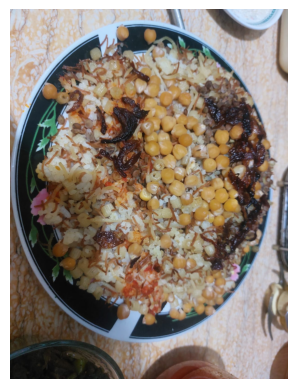

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("test.jpg").convert("RGB")
img_transformed = val_transform(img)
img_transformed = img_transformed.unsqueeze(0).to(device)
pred = model(img_transformed)
label = torch.argmax(pred, dim=1).item()
#print(label)
print(class_names[label])
#print(class_names[label])
plt.imshow(img, label=class_names[label])
plt.axis("off")

In [22]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [23]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5106, Train Accuracy: 85.69%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6044, Validation Accuracy: 86.58%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4916, Train Accuracy: 86.14%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6079, Validation Accuracy: 86.66%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4893, Train Accuracy: 86.31%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6042, Validation Accuracy: 86.72%


In [24]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 5e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [25]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.4965, Train Accuracy: 86.21%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6217, Validation Accuracy: 86.50%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [26]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [27]:
epochs = 3
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/3:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5017, Train Accuracy: 86.10%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.5969, Validation Accuracy: 86.54%


Epoch 2/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4890, Train Accuracy: 86.31%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6210, Validation Accuracy: 86.60%


Epoch 3/3:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4859, Train Accuracy: 86.55%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6212, Validation Accuracy: 86.75%


In [28]:
torch.save({
    'model_state_dict': model.state_dict(), 
    'optimizer_state_dict': optimizer.state_dict(),
    'class_names': class_names,
}, "checkpoint9.pth")

In [4]:
checkpoint = torch.load("checkpoint9.pth", map_location=device)
model = FoodClassifier(len(class_names)).to(device)
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [5]:
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-4},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-4}, 
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                       factor=0.5, patience=2,)

In [7]:
epochs = 10
train_with_scheduler_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/10:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.4727, Train Accuracy: 86.96%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6018, Validation Accuracy: 86.74%


Epoch 2/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4747, Train Accuracy: 86.71%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6178, Validation Accuracy: 86.70%


Epoch 3/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4744, Train Accuracy: 86.78%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6031, Validation Accuracy: 86.66%


Epoch 4/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.4679, Train Accuracy: 86.88%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6126, Validation Accuracy: 86.66%
Early Stopping to prevent overfitting


In [9]:
for name, module in model.named_modules():
    if 'classifier' in name and isinstance(module, nn.Dropout):
        module.p = 0.3

for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []
f7_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 5e-5, 'weight_decay': 1e-5},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-5},
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-5},  
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(T_0=10, T_mult=1, eta_min=1e-6, optimizer=optimizer)

In [14]:
import torch
from tqdm.auto import tqdm

def validate(model, val_loader, loss_fn, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.inference_mode():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader.dataset)
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss

def train_with_cos_anneal_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names, patience=3):
    cur_patience = 0
    min_loss = float('inf')
    delta = 0.0001
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        
        batch_idx = 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            batch_idx += 1
            scheduler.step(epoch + batch_idx / len(train_loader))
        
        train_loss /= len(train_loader.dataset)
        accuracy = correct / total * 100
        
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {accuracy:.2f}%")
        
        val_loss = validate(model, val_loader, loss_fn, device)
        
        if val_loss < min_loss - delta:
            cur_patience = 0
            min_loss = val_loss
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'class_names': class_names,  
            }, "final_model.pth")
        else:
            cur_patience += 1
            if cur_patience >= patience:
                print("Early Stopping to prevent overfitting")
                break

In [11]:
epochs = 10
train_with_cos_anneal_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/10:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

In [12]:
for name, module in model.named_modules():
    if 'classifier' in name and isinstance(module, nn.Dropout):
        module.p = 0.3

for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []
f7_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 5e-4, 'weight_decay': 1e-5},     
    {'params': f8_params, 'lr': 5e-5, 'weight_decay': 1e-5},
    {'params': f7_params, 'lr': 5e-5, 'weight_decay': 1e-5},  
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(T_0=10, T_mult=1, eta_min=1e-6, optimizer=optimizer)

In [13]:
epochs = 10
train_with_cos_anneal_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/10:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3898, Train Accuracy: 88.98%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6588, Validation Accuracy: 86.43%


Epoch 2/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3844, Train Accuracy: 89.02%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6760, Validation Accuracy: 86.40%


Epoch 3/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3711, Train Accuracy: 89.38%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6713, Validation Accuracy: 86.47%


Epoch 4/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3587, Train Accuracy: 89.61%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6722, Validation Accuracy: 86.52%
Early Stopping to prevent overfitting


In [14]:
for name, module in model.named_modules():
    if 'classifier' in name and isinstance(module, nn.Dropout):
        module.p = 0.3

for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []
f7_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-5},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-5},
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-5},  
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(T_0=10, T_mult=1, eta_min=0, optimizer=optimizer)

In [15]:
epochs = 10
train_with_cos_anneal_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names, patience=4)

Epoch 1/10:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3360, Train Accuracy: 90.37%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6515, Validation Accuracy: 86.65%


Epoch 2/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3291, Train Accuracy: 90.48%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6614, Validation Accuracy: 86.87%


Epoch 3/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3186, Train Accuracy: 90.73%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6586, Validation Accuracy: 86.91%


Epoch 4/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3177, Train Accuracy: 90.73%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6622, Validation Accuracy: 86.91%


Epoch 5/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3107, Train Accuracy: 90.83%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6533, Validation Accuracy: 86.90%
Early Stopping to prevent overfitting


In [17]:
for name, module in model.named_modules():
    if 'classifier' in name and isinstance(module, nn.Dropout):
        module.p = 0.4
        
                
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []
f7_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-5},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-5},
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-5},  
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(T_0=10, T_mult=1, eta_min=1e-6, optimizer=optimizer)

In [18]:
epochs = 10
train_with_cos_anneal_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names, patience=4)

Epoch 1/10:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3665, Train Accuracy: 89.50%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6425, Validation Accuracy: 86.97%


Epoch 2/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3550, Train Accuracy: 89.69%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6448, Validation Accuracy: 86.86%


Epoch 3/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3625, Train Accuracy: 89.67%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6427, Validation Accuracy: 87.06%


Epoch 4/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3515, Train Accuracy: 89.93%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6446, Validation Accuracy: 87.01%


Epoch 5/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3462, Train Accuracy: 90.09%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6364, Validation Accuracy: 86.85%


Epoch 6/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3444, Train Accuracy: 90.08%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6486, Validation Accuracy: 87.08%


Epoch 7/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3441, Train Accuracy: 90.04%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6414, Validation Accuracy: 87.10%


Epoch 8/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3391, Train Accuracy: 90.21%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6468, Validation Accuracy: 87.04%


Epoch 9/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3462, Train Accuracy: 90.06%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6353, Validation Accuracy: 87.05%


Epoch 10/10:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3366, Train Accuracy: 90.23%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6423, Validation Accuracy: 87.06%


In [3]:
import torch
from torch import nn
from torchvision.models import resnet50, ResNet50_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifierResNetBased(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = ResNet50_Weights.DEFAULT
        self.base_model = resnet50(weights=weights)
        #self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)    

In [4]:
import torch
from torch import nn
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

class FoodClassifierEfficientNetB3Based(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        weights = EfficientNet_B3_Weights.IMAGENET1K_V1
        self.base_model = efficientnet_b3(weights=weights)
        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier = nn.Sequential(
            nn.Dropout(p=0.4),
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        return self.base_model(x)

In [6]:
chk1 = torch.load("checkpoint6.pth", map_location=device)
chk2 = torch.load("final_model.pth", map_location=device)
model1 = FoodClassifierResNetBased(len(class_names)).to(device)
model2 = FoodClassifierEfficientNetB3Based(len(class_names)).to(device)

In [7]:
model1.load_state_dict(chk1["model_state_dict"])

<All keys matched successfully>

In [8]:
model2.load_state_dict(chk2["model_state_dict"])

<All keys matched successfully>

In [9]:
import torch
import torch.nn.functional as F
from tqdm.auto import tqdm

# Define your TTA transforms (augmentations you want at test time)
from torchvision import transforms

tta_transforms = [
    transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.RandomVerticalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
    transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ]),
]

def validate_ensemble_models(model1, model2, dataset, loss_fn, device, tta_transforms):
    model1.eval()
    model2.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.inference_mode():
        for img_pil, label in tqdm(dataset, desc="Validation with TTA"):
            label = torch.tensor(label).to(device)
            output_sum = None

            # Apply each TTA transform to the image and average the predictions
            for tform in tta_transforms:
                image = tform(img_pil).unsqueeze(0).to(device)  # Add batch dim
                output1 = model1(image)
                output2 = model2(image)
                output = (output1 + output2) / 2
                output_sum = output if output_sum is None else output_sum + output

            outputs = output_sum / len(tta_transforms)
            loss = loss_fn(outputs, label.unsqueeze(0))

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == label).item()
            total += 1

    val_loss /= total
    accuracy = correct / total * 100
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss

In [11]:
food101_val_raw = datasets.Food101(
    root='food101',
    split='test',
    download=False,
    transform=None,  
)

custom_val_raw = datasets.ImageFolder("images/val", transform=None)

concat_val_raw = ConcatDataset([
    OffsetDataset(food101_val_raw, 0),
    OffsetDataset(custom_val_raw, len(food101_train_dataset.classes))
])

loss_fn = nn.CrossEntropyLoss()

validate_ensemble_models(model1, model2, concat_val_raw, loss_fn, device, tta_transforms)


Validation with TTA:   0%|          | 0/25459 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Loss: 0.3837, Validation Accuracy: 89.95%


0.38370084527066245

In [12]:
model = model2.to(device)


In [ ]:
for name, module in model.named_modules():
    if 'classifier' in name and isinstance(module, nn.Dropout):
        module.p = 0.4
        
                
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []
f7_params = []
f6_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-5},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-5},
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-5},
    {'params': f6_params, 'lr': 1e-5, 'weight_decay': 1e-5},   
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(T_0=10, T_mult=1, eta_min=1e-6, optimizer=optimizer)

In [15]:
epochs = 5
train_with_cos_anneal_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/5:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3415, Train Accuracy: 90.12%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6462, Validation Accuracy: 87.14%


Epoch 2/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3396, Train Accuracy: 90.28%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6363, Validation Accuracy: 87.01%


Epoch 3/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3402, Train Accuracy: 90.23%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6361, Validation Accuracy: 87.09%


Epoch 4/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3358, Train Accuracy: 90.30%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6514, Validation Accuracy: 87.34%


Epoch 5/5:   0%|          | 0/2382 [00:00<?, ?it/s]

Train Loss: 0.3343, Train Accuracy: 90.35%


Validation:   0%|          | 0/796 [00:00<?, ?it/s]

Validation Loss: 0.6552, Validation Accuracy: 87.14%


In [16]:
for name, module in model.named_modules():
    if 'classifier' in name and isinstance(module, nn.Dropout):
        module.p = 0.4
        
                
for param in model.parameters(): # Freeze all parameters initially
    param.requires_grad = False
    
for name, param in model.base_model.named_parameters():
    if 'classifier' in name or 'features.8' in name or 'features.7' in name or 'features.6' in name: # Unfreeze last two blocks
        param.requires_grad = True

        
no_decay_params = []
classifier_params = []
f8_params = []
f7_params = []
f6_params = []

# collect all BatchNorm params
bn_params = set()
for module in model.modules():
    if isinstance(module, (nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d)):
        for p in module.parameters():
            bn_params.add(p)

for name, param in model.named_parameters():
    if not param.requires_grad:
        continue
    if param in bn_params or name.endswith(".bias"):
        no_decay_params.append(param)
    elif "classifier" in name:
        classifier_params.append(param)
    elif "features.8" in name:
        f8_params.append(param)
    elif "features.7" in name:
        f7_params.append(param)
    elif "features.6" in name:
        f6_params.append(param)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW([
    {'params': classifier_params, 'lr': 1e-4, 'weight_decay': 1e-5},     
    {'params': f8_params, 'lr': 1e-5, 'weight_decay': 1e-5},
    {'params': f7_params, 'lr': 1e-5, 'weight_decay': 1e-5},
    {'params': f6_params, 'lr': 1e-5, 'weight_decay': 1e-5},   
    {'params': no_decay_params, 'lr': 1e-5, 'weight_decay': 0},
])

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(T_0=10, T_mult=1, eta_min=1e-6, optimizer=optimizer)

In [17]:
epochs = 5
train_with_cos_anneal_early_stop(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, device, class_names)

Epoch 1/5:   0%|          | 0/2382 [00:00<?, ?it/s]

c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

In [31]:
def validate_ensemble_models_with_dataloader(model1, model2, dataloader, loss_fn, device, tta_transforms):
    """
    Validates an ensemble of models using a DataLoader and Test-Time Augmentation (TTA).

    Args:
        model1 (torch.nn.Module): The first model in the ensemble.
        model2 (torch.nn.Module): The second model in the ensemble.
        dataset (torch.utils.data.Dataset): The validation dataset.
        batch_size (int): The batch size for the DataLoader.
        loss_fn (callable): The loss function.
        device (torch.device): The device to run the models on (e.g., 'cuda' or 'cpu').
        tta_transforms (list): A list of torchvision transforms for TTA.
    """
    model1.eval()
    model2.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    # Use torch.inference_mode() for efficiency and to disable gradient computation
    with torch.inference_mode():
        for images_pil, labels in tqdm(dataloader, desc="Validation with TTA"):
            labels = labels.to(device)
            
            output_sum = None
            for tform in tta_transforms:
                augmented_images_tensor = torch.stack([tform(img) for img in images_pil]).to(device)

                output1 = model1(augmented_images_tensor)
                output2 = model2(augmented_images_tensor)
                
                output_batch = (output1 + output2) / 2
                
                if output_sum is None:
                    output_sum = output_batch
                else:
                    output_sum += output_batch
            
            final_outputs = output_sum / len(tta_transforms)

            loss = loss_fn(final_outputs, labels)
            
            val_loss += loss.item() * augmented_images_tensor.size(0) 
            
            _, predicted = torch.max(final_outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= total
    accuracy = correct / total * 100
    
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss


In [34]:
def pil_collate(batch):
        images, labels = zip(*batch)
        return list(images), torch.tensor(labels, dtype=torch.long)

def validate_single_model_with_dataloader(model, dataloader, loss_fn, device, tta_transforms):
    """
    Validates an ensemble of models using a DataLoader and Test-Time Augmentation (TTA).

    Args:
        model (torch.nn.Module): The model used during evaluation
        dataset (torch.utils.data.Dataset): The validation dataset.
        batch_size (int): The batch size for the DataLoader.
        loss_fn (callable): The loss function.
        device (torch.device): The device to run the models on (e.g., 'cuda' or 'cpu').
        tta_transforms (list): A list of torchvision transforms for TTA.
    """
    model.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    # Use torch.inference_mode() for efficiency and to disable gradient computation
    with torch.inference_mode():
        for images_pil, labels in tqdm(dataloader, desc="Validation with TTA"):
            labels = labels.to(device)
            
            output_sum = None
            for tform in tta_transforms:
                augmented_images_tensor = torch.stack([tform(img) for img in images_pil]).to(device)
                
                output_batch = model(augmented_images_tensor)
                
                if output_sum is None:
                    output_sum = output_batch
                else:
                    output_sum += output_batch
            
            final_outputs = output_sum / len(tta_transforms)

            loss = loss_fn(final_outputs, labels)
            
            val_loss += loss.item() * augmented_images_tensor.size(0) 
            
            _, predicted = torch.max(final_outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= total
    accuracy = correct / total * 100
    
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss


In [30]:
food101_val_raw = datasets.Food101(
    root='food101',
    split='test',
    download=False,
    transform=None,  
)

custom_val_raw = datasets.ImageFolder("images/val", transform=None)

concat_val_raw = ConcatDataset([
    OffsetDataset(food101_val_raw, 0),
    OffsetDataset(custom_val_raw, len(food101_train_dataset.classes))
])

dataloader = DataLoader(
        concat_val_raw,
        batch_size=32,
        shuffle=False,
        collate_fn=pil_collate
    )

loss_fn = nn.CrossEntropyLoss()

validate_single_model_models_with_dataloader(model1, dataloader, loss_fn, device, tta_transforms)

Validation with TTA:   0%|          | 0/795 [00:00<?, ?it/s]

Validation Loss: 0.4191, Validation Accuracy: 88.51%


0.4191167122222935

In [ ]:
validate_single_model_with_dataloader(model2, dataloader, loss_fn, device, tta_transforms)

Validation with TTA:   0%|          | 0/795 [00:00<?, ?it/s]

Validation Loss: 0.5574, Validation Accuracy: 87.47%


0.5573974248240506

In [33]:
validate_ensemble_models_with_dataloader(model1, model2, dataloader, loss_fn, device, tta_transforms)

Validation with TTA:   0%|          | 0/795 [00:00<?, ?it/s]

Validation Loss: 0.3858, Validation Accuracy: 90.02%


0.385801727793176

In [37]:
def validate_weighted_ensemble_models_with_dataloader(model1, model2, weight1, weight2, dataloader, loss_fn, device, tta_transforms):
    """
    Validates an ensemble of models using a DataLoader and Test-Time Augmentation (TTA).

    Args:
        model1 (torch.nn.Module): The first model in the ensemble.
        model2 (torch.nn.Module): The second model in the ensemble.
        dataset (torch.utils.data.Dataset): The validation dataset.
        batch_size (int): The batch size for the DataLoader.
        loss_fn (callable): The loss function.
        device (torch.device): The device to run the models on (e.g., 'cuda' or 'cpu').
        tta_transforms (list): A list of torchvision transforms for TTA.
    """
    model1.eval()
    model2.eval()

    val_loss = 0.0
    correct = 0
    total = 0

    # Use torch.inference_mode() for efficiency and to disable gradient computation
    with torch.inference_mode():
        for images_pil, labels in tqdm(dataloader, desc="Validation with TTA"):
            labels = labels.to(device)
            
            output_sum = None
            for tform in tta_transforms:
                augmented_images_tensor = torch.stack([tform(img) for img in images_pil]).to(device)

                output1 = model1(augmented_images_tensor)
                output2 = model2(augmented_images_tensor)
                
                output_batch = (weight1 * output1 + weight2 * output2)
                
                if output_sum is None:
                    output_sum = output_batch
                else:
                    output_sum += output_batch
            
            final_outputs = output_sum / len(tta_transforms)

            loss = loss_fn(final_outputs, labels)
            
            val_loss += loss.item() * augmented_images_tensor.size(0) 
            
            _, predicted = torch.max(final_outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= total
    accuracy = correct / total * 100
    
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return val_loss


In [ ]:
validate_weighted_ensemble_models_with_dataloader(model1, model2, 0.6, 0.4, dataloader, loss_fn, device, tta_transforms) 
# this is best result

Validation with TTA:   0%|          | 0/795 [00:00<?, ?it/s]

Validation Loss: 0.3726, Validation Accuracy: 90.12%


0.3725600088950743

In [39]:
validate_weighted_ensemble_models_with_dataloader(model1, model2, 0.7, 0.3, dataloader, loss_fn, device, tta_transforms)

Validation with TTA:   0%|          | 0/795 [00:00<?, ?it/s]

Validation Loss: 0.3674, Validation Accuracy: 90.08%


0.3673996737924187

In [40]:
validate_weighted_ensemble_models_with_dataloader(model1, model2, 0.65, 0.35, dataloader, loss_fn, device, tta_transforms)

Validation with TTA:   0%|          | 0/795 [00:00<?, ?it/s]

Validation Loss: 0.3689, Validation Accuracy: 90.11%


0.3689083068071902

In [ ]:
# Finally got to the 90% accuracy mark 

In [5]:
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
state1 = torch.load("final_resnet_model.pth", map_location=DEVICE)
state2 = torch.load("final_efficientnet_model.pth", map_location=DEVICE)
NUM_CLASSES = len(state1["class_names"])
model1 = FoodClassifierResNetBased(num_classes=NUM_CLASSES).to(DEVICE)
model2 = FoodClassifierEfficientNetB3Based(num_classes=NUM_CLASSES).to(DEVICE)
model1.load_state_dict(state1["model_state_dict"])
model2.load_state_dict(state2["model_state_dict"])
class_names = state1["class_names"]



In [4]:
def get_tta_transforms():
    return [
        transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop(224),
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]),
        transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop(224),
            transforms.RandomVerticalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]),
        transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]),
    ]

In [7]:
import torch

torch.save({
    'model1_state_dict_resnet': model1.state_dict(),
    'class_names': class_names,}, "resnet_model.pth")

torch.save({
    'model2_state_dict_efficientnet': model2.state_dict(),
    }, "efficientnet_model.pth")